In [1]:
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
import os
import tensorflow as tf
import matplotlib
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from PIL import Image
import numpy as np

In [2]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = '../DATASET/train/'
VALID_DATA_DIR = '../DATASET/validation/'

In [3]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    shuffle=True,
    target_size=IMAGE_SHAPE,
)

valid_generator = datagen.flow_from_directory(
    VALID_DATA_DIR,
    shuffle=False,
    target_size=IMAGE_SHAPE,
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [5]:
def build_model(num_classes):
    
    model = tf.keras.Sequential()
    
    model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3))) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.6))

    model.add(Dense(num_classes, activation='softmax'))
              
    model.summary()
    
    return model

def use_model(path):
    
    model = tf.keras.models.load_model('./basic_classifier.h5')

    pic = Image.open(path).resize((IMAGE_SHAPE[0], IMAGE_SHAPE[1]))
    plt.imshow(pic)
    
    prediction = model.predict(np.expand_dims(pic, axis=0))[0]
    
    lst = [i for i,prob in enumerate(prediction) if prob > 0.5][0]
    
    return 'Organic' if lst==0 else 'Recyclable'

In [ ]:
model = build_model(2)

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='classifier_72597802.h5',
                                              save_best_only=True,
                                              monitor='val_loss',
                                              verbose=1,
                                              mode='auto')

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
EPOCHS = 10
BATCH_SIZE = 32
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=valid_generator,
                    validation_steps= valid_generator.samples // BATCH_SIZE,
                    verbose=1,
                    callbacks=[callback]
                    )

Recyclable


2022-05-15 20:13:13.930247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


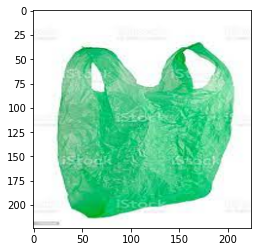

In [7]:
print(use_model('./images/r_test3.jpeg'))

In [ ]:
def build_model(num_classes):
    
    model = tf.keras.Sequential()
    
    model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3))) 
#     model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
#     model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
#     model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu')) 
#     model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
#     model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu')) 
#     model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
#     model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
    
    model.add(Flatten())
    
#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.6))
#     model.add(Dense(256, activation='relu'))
#     model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.6))

    model.add(Dense(num_classes, activation='softmax'))
              
    model.summary()
    
    return model

def use_model(path):
    
    model = tf.keras.models.load_model('./classifier_72597802.h5')

    pic = Image.open(path).resize((IMAGE_SHAPE[0], IMAGE_SHAPE[1]))
    plt.imshow(pic)
    
    prediction = model.predict(np.expand_dims(pic, axis=0))
    return prediction
    
#     lst = [i for i,prob in enumerate(prediction) if prob > 0.5][0]
    
#     return 'Organic' if lst==0 else 'Recyclable'